# Impulso e degrau

Neste notebook vamos falar sobre os sinais ***impulso unitário*** e ***degrau unitário***

In [1]:
# importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

## 1. Impulso unitário

$\delta(t)$


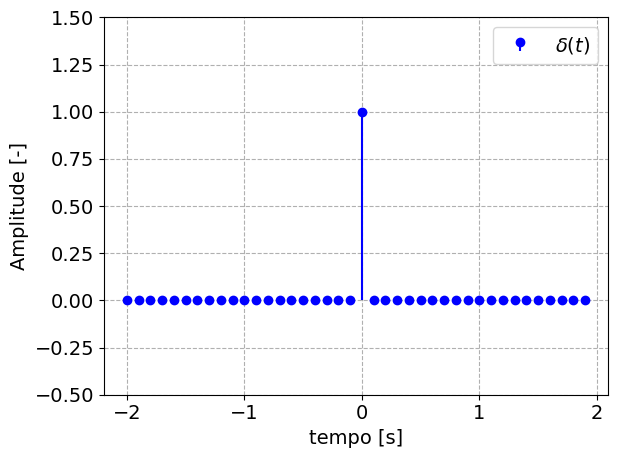

In [5]:
# Um impulso unitário
t = np.arange(start = -2, stop = 2, step=0.1) # vetor temporal
xt = np.zeros(len(t))
xt[np.where(np.logical_and(t>=-2e-10,t<=2e-10))] = 1 #complicado assim só por conta de arredondamentos numéricos (as vezes t=0 não é parte do vetor temporal)

plt.figure()
plt.stem(t, xt, '-b', label = r'$\delta(t)$', basefmt=" ")
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude [-]')
plt.ylim((-0.5, 1.5))
plt.tight_layout()   
plt.show()

## 2. Impulso unitário deslocado

$\delta(t-t_0)$

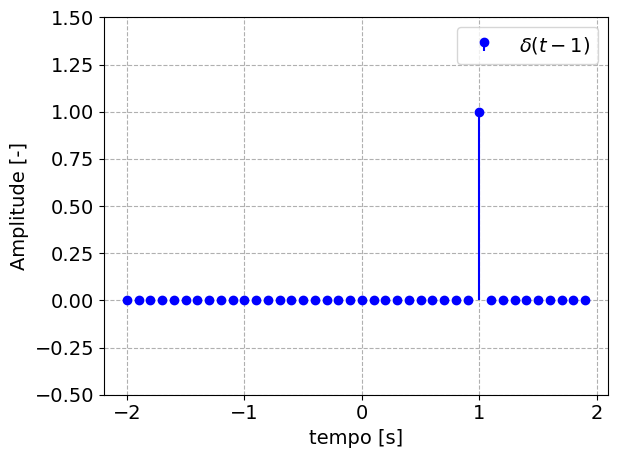

In [7]:
# Um impulso unitário
t = np.arange(start = -2, stop = 2, step=0.1)  # vetor temporal
xt = np.zeros(len(t))
xt[np.where(np.logical_and(t>=1-2e-10,t<=1+2e-10))] = 1 # 

plt.figure()
plt.stem(t, xt, '-b', label = r'$\delta(t-1)$', basefmt=" ")
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude [-]')
plt.ylim((-0.5, 1.5))
plt.tight_layout()   
plt.show()

## 3. Trem de impulsos

O trem de impulsos é dado por:

\begin{equation}
s(t) = \sum_{n = -\infty}^{\infty}\delta(t-n\Delta)
\end{equation}
em que $\Delta$ [s] é chamado de ***período de amostragem***. De fato, $\Delta = 1/F_s$, em que $F_s$ é a frequência de amostragem ou o número de amostras por segundo que a sua placa de som ou sistema de aquisição obtém.

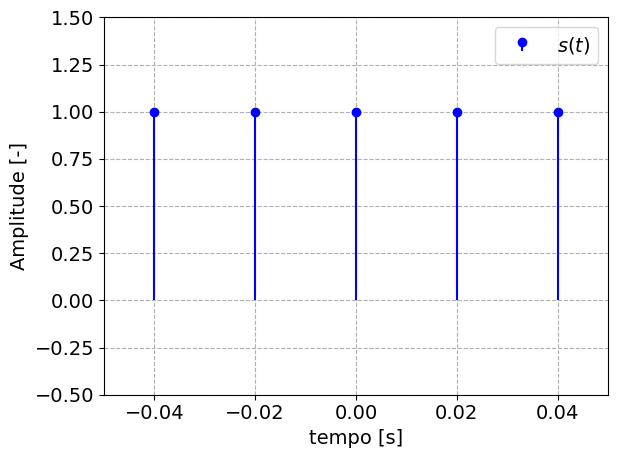

In [9]:
# Frequência de amostragem
Fs = 50
Delta = 1/Fs

t = np.arange(start = -2, stop = 2, step = Delta)
st = np.ones(len(t))

plt.figure()
plt.stem(t, st, '-b', label = r'$s(t)$', basefmt=" ")
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((-0.05, 0.05))
plt.ylim((-0.5, 1.5))
plt.tight_layout()   
plt.show()

# Propriedade da filtragem

A propriedade da filtragem especifica que

\begin{equation}
\int\limits_{-\infty}^{\infty}\delta(t-t_0)f(t)\text{d} t = f(t_0)
\end{equation}

Pode ser vista da seguinte forma:

- Valor do produto interno: $<\delta(t-t_0), f(t)>$ é o valor de $f(t)$ avaliado em $t_0$;
- Claro, o único instante em que $f(t)\delta(t-t_0) \neq 0$ é em $t=t_0$;

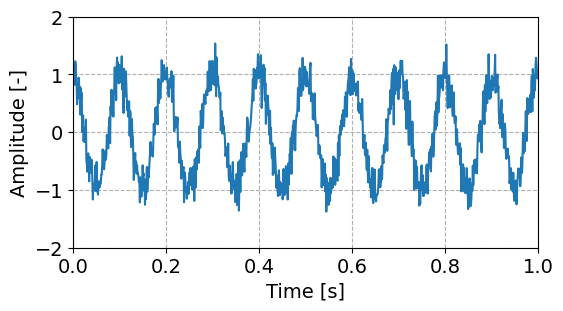

In [52]:
t = np.arange(start = 0, stop = 1, step = 0.001) # vetor temporal
xt = np.cos(2*np.pi*10*t) + np.random.normal(0, 0.2, size = len(t))

plt.figure(figsize = (6,3))
plt.plot(t,xt)
plt.grid(linestyle = '--')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [-]");

In [84]:
time_instant = 0.25

print(r'Value of x(t) at t = {} [s] is {:.4f}'.format(time_instant, xt[int(time_instant*(1/t[1]))]))

# Via inner product
delta_t_t0 = np.zeros(len(t))
delta_t_t0[int(time_instant*(1/t[1]))] = 1
inner_prod = np.dot(xt, delta_t_t0)

print(r'Value of Inner product is {:.4f}'.format(inner_prod))

Value of x(t) at t = 0.25 [s] is -0.8512
Value of Inner product is -0.8512


# 4. Degrau unitário

Esta função está relacionada ao impulso unitário da seguinte forma

\begin{equation}
u(t) = \int_{-\infty}^{t}\delta(\tau) \mathrm{d} \tau
\end{equation}

ou

\begin{equation}
\frac{\mathrm{d}u(t)}{\mathrm{d} t} = \delta(t) 
\end{equation}

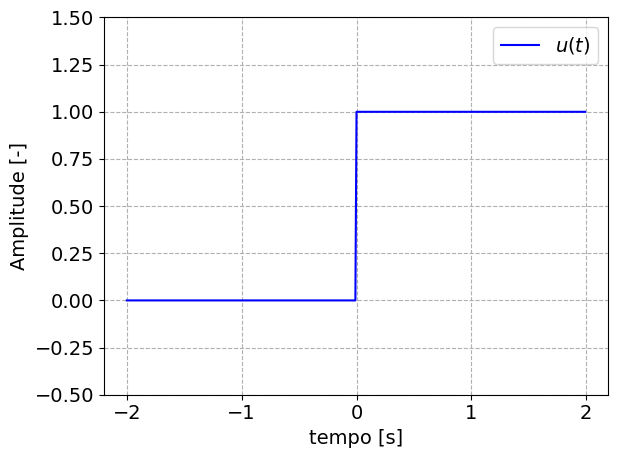

In [11]:
t = np.arange(start = -2, stop = 2, step=0.01)  # vetor temporal
xt = np.ones(len(t))
xt[t<0] = 0 # 

plt.figure()
plt.plot(t, xt, '-b', label = r'$u(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude [-]')
plt.ylim((-0.5, 1.5))
plt.tight_layout()   
plt.show()